<a href="https://colab.research.google.com/github/szaveri99/ML_Assignments/blob/master/ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset:
airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck 										

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 


## Importing the required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import tensorflow as tf
from tensorflow import keras


In [14]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [15]:
from keras.datasets import cifar10

## Load and Explore the Data

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3639s 21us/step


In [18]:

X_train.shape

(50000, 32, 32, 3)

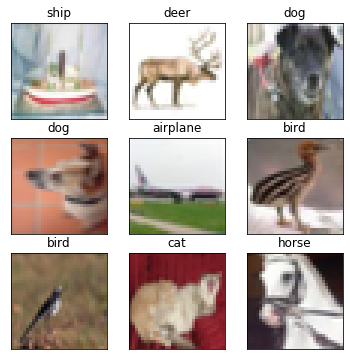

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])


question 1

In [20]:

X_train = X_train/255
X_test = X_test/255

In [21]:

X_train = X_train.reshape(50000,3072 )
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('uint8')
X_test = X_test.astype('uint8')

X_train.shape
X_test.shape

(10000, 3072)

In [22]:
print("label :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("vector : ",Y_train[0])

label : [6]
vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


question 2


In [23]:
model_relu = Sequential()

#1
model_relu.add(Dense(512, input_dim=3072, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.3))
#2
model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.3))
# 3
model_relu.add(Dense(10, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model_relu.fit(X_train, Y_train, batch_size=32, epochs=50)


Epoch 1/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.4172 - accuracy: 0.1330
Epoch 2/50
50000/50000 [==============================] - 56s 1ms/step - loss: 2.2517 - accuracy: 0.1591
Epoch 3/50
50000/50000 [==============================] - 60s 1ms/step - loss: 2.1994 - accuracy: 0.1783
Epoch 4/50
50000/50000 [==============================] - 58s 1ms/step - loss: 2.1522 - accuracy: 0.1952
Epoch 5/50
50000/50000 [==============================] - 56s 1ms/step - loss: 2.1015 - accuracy: 0.2148
Epoch 6/50
50000/50000 [==============================] - 56s 1ms/step - loss: 2.0475 - accuracy: 0.2368
Epoch 7/50
50000/50000 [==============================] - 57s 1ms/step - loss: 2.0045 - accuracy: 0.2515
Epoch 8/50
50000/50000 [==============================] - 58s 1ms/step - loss: 1.9610 - accuracy: 0.2702
Epoch 9/50
50000/50000 [==============================] - 58s 1ms/step - loss: 1.9236 - accuracy: 0.2798
Epoch 10/50
50000/50000 [=============================

In [24]:
pred_score = model_relu.evaluate(X_test, Y_test, verbose=0)
print(pred_score)

[2.877524270057678, 0.14730000495910645]


In [25]:
X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)

In [26]:
model = Sequential()

#1
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32,32,3), activation='relu', kernel_initializer='he_normal'))
# 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
# 3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

#4
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
# 5
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
#6
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=50)


Epoch 1/50
50000/50000 [==============================] - 296s 6ms/step - loss: 2.2646 - accuracy: 0.1425
Epoch 2/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2318 - accuracy: 0.15411s - loss: 2.2316 
Epoch 3/50
50000/50000 [==============================] - 294s 6ms/step - loss: 2.2075 - accuracy: 0.1681
Epoch 4/50
50000/50000 [==============================] - 291s 6ms/step - loss: 2.1824 - accuracy: 0.17762s - loss:
Epoch 5/50
50000/50000 [==============================] - 288s 6ms/step - loss: 2.1557 - accuracy: 0.1901
Epoch 6/50
50000/50000 [==============================] - 292s 6ms/step - loss: 2.1227 - accuracy: 0.2018
Epoch 7/50
50000/50000 [==============================] - 302s 6ms/step - loss: 2.0946 - accuracy: 0.2143
Epoch 8/50
50000/50000 [==============================] - 308s 6ms/step - loss: 2.0641 - accuracy: 0.2272
Epoch 9/50
50000/50000 [==============================] - 307s 6ms/step - loss: 2.0325 - accuracy: 0.2369
Epoch 10/50
50000

In [27]:
pred_score = model.evaluate(X_test, Y_test, verbose=0)
print( pred_score)

[2.637281509780884, 0.16509999334812164]


question 4

In [28]:
model = Sequential()

# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# conv3-64
model.add(Conv2D(64, (3, 3), padding = 'same',input_shape = (32,32,3) ,activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# FC-512
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
# FC-10
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 197s 4ms/step - loss: 2.2322 - accuracy: 0.1559
Epoch 2/50
50000/50000 [==============================] - 197s 4ms/step - loss: 2.1994 - accuracy: 0.1715
Epoch 3/50
50000/50000 [==============================] - 196s 4ms/step - loss: 2.1811 - accuracy: 0.1809
Epoch 4/50
50000/50000 [==============================] - 194s 4ms/step - loss: 2.1618 - accuracy: 0.1838
Epoch 5/50
50000/50000 [==============================] - 199s 4ms/step - loss: 2.1388 - accuracy: 0.1939
Epoch 6/50
50000/50000 [==============================] - 199s 4ms/step - loss: 2.1112 - accuracy: 0.2081
Epoch 7/50
50000/50000 [==============================] - 192s 4ms/step - loss: 2.0814 - accuracy: 0.2176
Epoch 8/50
50000/50000 [==============================] - 166s 3ms/step - loss: 2.0493 - accuracy: 0.2290
Epoch 9/50
50000/50000 [==============================] - 164s 3ms/step - loss: 2.0205 - accuracy: 0.2395
Epoch 10/50
50000/50000 [=====================

In [29]:
lossanda = model.evaluate(X_test, Y_test, verbose=0)
print(lossanda)

[2.809166976928711, 0.16519999504089355]
